# Derivation of perspective matrix to show particles ejected from pebble rod
![Optical system](system.png "Optical system")

We are trying to represent pebbles that are located at an distance $\mathbf{d}=x\hat{x} + y\hat{y} + z\hat{z}$ from surface of the rod, with the initial center of coordinates at the axis of the rod.

The pebbles are captured by a camera located at a working distance $d_{\mathrm{w}}$ from the rod, tilted $\theta$ degrees from the axis of the rod.

Consider $x=0$ and $z>0$. Then the pebble will appear to be at $\tilde{x}>0$.

First, apply a rotation around the $\hat{y}$ axis:
$$
\begin{equation}
\begin{pmatrix}
{\tilde{x}} \\
\tilde{y} \\
\tilde{z}
\end{pmatrix}
=
\begin{pmatrix}
\cos\theta & 0 & \sin\theta \\
0 & 1 & 0 \\
-\sin\theta & 0 & \cos\theta
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
z
\end{pmatrix}
\end{equation}
$$

Consider a known distance $d_{\mathrm{rod}}$ between the surface of the rod and the thin lens. Then,
$$
\begin{equation}
\tilde{z} = d_{\mathrm{rod}} - d_{\mathrm{o}}
\tag{1}
\end{equation}
$$

Remember the thin lens equation
$$
\begin{equation}
\frac{1}{ d_{\mathrm{o}} } + \frac{1}{d_{\mathrm{i}}} = \frac{1}{f}
\tag{2}
\end{equation}
$$

Additionally, the lens magnification is defined as
$$
\begin{equation}
M = \frac{\tilde{x}_{\mathrm{i}}}{\tilde{x}_{\mathrm{o}}} = -\frac{d_{\mathrm{i}}}{d_{\mathrm{o}}}.
\end{equation}
$$

We want to know $\tilde{x}_{\mathrm{i}}$. Then
$$
\begin{equation}
\frac{1}{d_{\mathrm{o}}} - \frac{\tilde{x}_{\mathrm{o}}}{\tilde{x}_{\mathrm{i}} d_{\mathrm{o}}} = \frac{1}{f}
\end{equation}
$$

Factoring $d_{\mathrm{o}}$:
$$
\begin{equation}
\frac{1}{d_{\mathrm{o}}} \left(1 - \frac{\tilde{x}_{\mathrm{o}}}{\tilde{x}_{\mathrm{i}} } \right) = \frac{1}{f}
\end{equation}
$$

Plugging equation (1):
$$
\begin{equation}
1 - \frac{\tilde{x}_{\mathrm{o}}}{\tilde{x}_{\mathrm{i}} } = \frac{d_{\mathrm{rod}} - \tilde{z}}{f}
\end{equation}
$$

Solving for $\tilde{x}_{\mathrm{i}}$:

$$
\begin{equation}
\tilde{x}_{\mathrm{i}} = \tilde{x}_{\mathrm{o}} \left(\frac{f}{d_{\mathrm{rod}} - \tilde{z} - f}\right)
\end{equation}
$$

The height of an object in the camera sensor $\tilde{x}_{\mathrm{i}}$ is also proportional to the magnification $M$:
$$
\begin{equation}
\tilde{x}_{\mathrm{i}} = \tilde{x}_{\mathrm{o}} M
\end{equation}
$$

At $z=0$ we can write
$$
\begin{equation}
\frac{\tilde{x}_{\mathrm{i}}}{\tilde{x}_{\mathrm{o}}} = M =  \left(\frac{f}{d_{\mathrm{rod}} - f}\right)
\end{equation}
$$
Dividing by $M$:
$$
\begin{equation}
 1 =  \left(\frac{f}{d_{\mathrm{rod}} - f}\right)\frac{1}{M}
\end{equation}
$$
Multiplying by $d_{\mathrm{rod}} - f$
$$
\begin{equation}
d_{\mathrm{rod}} - f =  \left(\frac{f}{M}\right)
\end{equation}
$$

Plugging $d_{\mathrm{rod}} - f = \frac{f}{M}$ into the transformation
$$
\begin{equation}
\tilde{x}_{\mathrm{i}} = \tilde{x}_{\mathrm{o}} \left(\frac{f}{ f/M - \tilde{z}}\right),
\end{equation}
$$


An object of known length (e.g. a ruler) can be placed at $z=0$, determine the $\tilde{x}_{\mathrm{cal,o}}$ and use the number of pixels $N$ it spans, to determine the magnification:
$$
\begin{equation}
M = \frac{N \tilde{x}_{\mathrm{pixel}} }{ \tilde{x}_{\mathrm{cal,o}} },
\end{equation}
$$
Where $\tilde{x}_{\mathrm{pixel}}$ is the size of each pixel in the camera sensor. Alternatively, we can use a calibration to obtain the number of pixels span on an object of a known length $p_{c}$ with units [pixels / unit length]. For example $p_c = 20.8~\mathrm{pixels}/\mathrm{mm}$:
$$
\begin{equation}
M = \tilde{x}_{\mathrm{pixel}} p_c
\end{equation}
$$

In [11]:
import numpy as np
from typing import Union

def rotate_y(xyz: np.ndarray, angle: float) -> np.ndarray:
    rot_matrix = np.array([[np.cos(angle), 0., np.sin(angle)], [0., 1., 0.], [-np.sin(angle), 0, np.cos(angle)]])
    xyz_prime = rot_matrix @ np.squeeze(xyz)
    return xyz_prime

# Try rotating a the unit vectors (1,0,0), (0,1,0), and (0,0,1)
e_x = np.array([0,0,1])
print("Rotating vector\n", e_x)
print(np.round(rotate_y(e_x, np.pi/2), decimals=3)) 

Rotating vector
 [0 0 1]
[1. 0. 0.]


In [12]:
import matplotlib.pyplot as plt

pc_pxpmm = 20.8
pc_pxpcm = pc_pxpmm * 10 # pixel / cm
x_pixel_cm = 3.45E-4 # cm / pixel

M = x_pixel_cm * pc_pxpcm
theta_camera = 18 # degrees
FOCAL_LENGTH = 9 # cm
WD = 34 # cm
theta = 18

def perspective_correction(xyz: np.ndarray, f: float, M: float=M) -> np.ndarray:
    xyz = np.squeeze(xyz)
    z = xyz[2]
    c = f / (f/M - z)
    result = np.array([c*xyz[0], c*xyz[1]])
    return result

# def perspective_correction(xyz: np.ndarray, f: float, wd: float = WD) -> np.ndarray:
#     xyz = np.squeeze(xyz)
#     z = xyz[2]
#     c = f / (wd - z - f)
#     result = np.array([c*xyz[0], c*xyz[1]])
#     return result

    

In [13]:
N = 20 # number of particles to simulate
T_MAX = 1 # maximum time in the simulation (s)
M = 20 # number of time points to simulate
initial_velocities = np.random.normal(loc=10, scale=5, size=N)
initial_theta = np.random.normal(loc=0, scale=np.pi/8, size=N)
initial_phi = np.random.normal(loc=0, scale=np.pi, size=N)

dt = T_MAX / (M - 1)
time_system = np.arange(M) * dt

def evolve_system(v_i: float, theta: float, phi: float,  t: float, r_0: np.ndarray = np.array([0, 0, 0])) -> np.ndarray:
    v_sin_theta = v_i * np.sin(theta)
    v_0_x = v_sin_theta * np.cos(phi)
    v_0_y = v_sin_theta * np.sin(phi)
    v_0_z = v_i * np.cos(theta)
    x_t = r_0[0] + v_0_x * t
    y_t = r_0[1] + v_0_y * t - 0.5 * 9.8 * t ** 2
    z_t = r_0[2] + v_0_z * t
    return np.array([x_t, y_t, z_t])


 
    

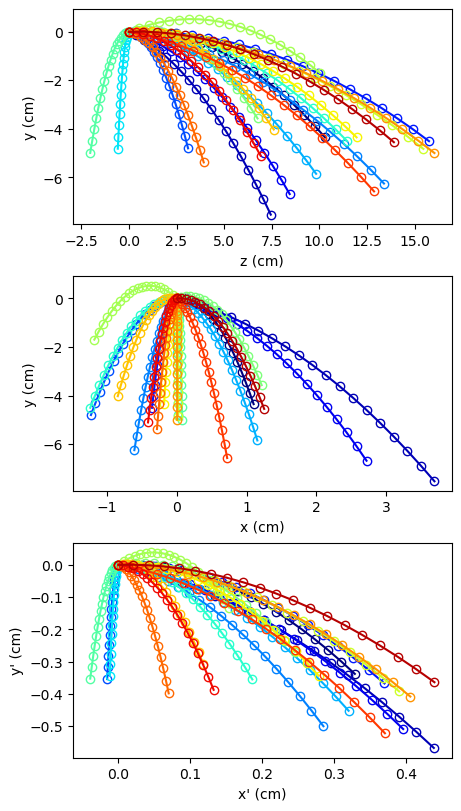

In [15]:
import matplotlib.pyplot as plt
import matplotlib.colors as mp_colors
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, constrained_layout=True)
fig.set_size_inches(4.5, 8)

cm = plt.get_cmap('jet')
norm = mp_colors.Normalize(vmin=0, vmax=N)
for i in range(N):
    c = cm(norm(i))
    r_i = np.zeros((int(M), 3))
    r_cam = np.zeros((int(M), 3))
    v_i = initial_velocities[i]
    theta_i = initial_theta[i]
    phi_i = initial_phi[i]
    for j, t in enumerate(time_system):
        r_evolved = evolve_system(
            v_i=v_i, theta=theta_i, phi=phi_i, t=t
        )
        r_i[j] = r_evolved   
        r_rotated = rotate_y(xyz=r_evolved, angle=np.radians(theta))
        r_cam[j] = r_rotated
        r_perspective = perspective_correction(xyz=r_rotated, f=FOCAL_LENGTH)
        r_cam[j,0] = r_perspective[0]
        r_cam[j,1] = r_perspective[1]
        r_cam[j,2] = 0
    ax1.plot(r_i[:,2], r_i[:,1], c=c, marker='o', ms=6, mfc='None')
    ax2.plot(r_i[:,0], r_i[:,1], c=c, marker='o', ms=6, mfc='None')
    ax3.plot(r_cam[:,0], r_cam[:,1], c=c, marker='o', ms=6, mfc='None')


ax1.set_xlabel('z (cm)')
ax1.set_ylabel('y (cm)')
ax2.set_xlabel('x (cm)')
ax2.set_ylabel('y (cm)')
ax3.set_xlabel('x\' (cm)')
ax3.set_ylabel('y\' (cm)')
# ax3.set_xlim(-1., 5.)
# ax3.set_ylim(-6, 2.)

plt.show()
        
        